## Segmenting and Clustering Affordable Rental Project in San Francisco
1. - Introduction: Business Problem
2. - Data
    2.1 - Source of Data
    2.2 - Download and Explore Dataset

3. - Methodology

4. - Analysis
  <p> 4.1 - Analyze Each Project </p>
  <p> 4.2 - Cluster Projects </p>
  <p> 4.3 - Examine Clusters </p>

5. - Results and Discussion

6. - Conclusion

## 1. Introduction
### Business Problem

+ Let assume that your boss request you to have a business trip at San Francisco for 3 month with a limited budget. 

+ There would be a thousand rental house in San Francisco is waiting for you. There for your have a look to the listed affordable rental house published by Mayor's Office of Housing and Community Development Affordable Rental. 

+ You need to choose the right one which have an affordable payment and nearest the living facility that make you save more money from transportation and movement times.

+ In this project, I will try to find a category of optimal affordable rental projects with better living facilities. This report will be targeted to individuals who want to travel to San Francisco for business or holiday with a limit budget. 

--> With machine learning power and some preprocessing, analysis, visualization technique we have learned in 8 course previous. I will cluster all the affordable rentals programs into several catergories, advantages of each category will then be clearly expressed to help visitor choose the best one which suitable for them.


## 2. Data
### 2.1 Source of Data

Based on the business problem, factors that will influence individuals to make the first-step decission are:

    * Number of existing facilities around each project
    * Type of existing facilities around each project

Following data sources will be needed to generate the proper decission:

    * Basic information (project name/location/Year Affordability Began) of all the affordable rental programs, which can be get from open data website of San Francisco GOV (https://data.sfgov.org/)
    * Number of existing facilities and their type and location in every neighborhood will be obtained using Foursquare API

### 2.2 Download and Explore Dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
df_api = pd.read_csv('https://data.sfgov.org/resource/yd5s-bd6e.csv')
print('Load data finished')

Load data finished


In [3]:
df_api.head()

,:@computed_region_26cr_cadq,:@computed_region_6qbp_sg9q,:@computed_region_ajp5_b2md,:@computed_region_bh8s_q3mv,:@computed_region_fyvs_ahh9,:@computed_region_p5aj_wyqh,:@computed_region_qgnn_b9vv,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,_1_bedroom_units,_2_bedroom_units,_3_bedroom_units,_4_bedroom_units,_5_bedroom_or_larger_units,affordable_beds,affordable_units,disabled_units,family_units,homeless_units,latitude,longitude,losp_units,neighborhood,planning_neighborhood,project_address,project_id,project_location,project_location_address,project_location_city,project_location_state,project_location_zip,project_name,project_sponsor,senior_units,single_room_occupancy_units,street_name,street_number,street_type,studio_units,supervisor_district,tay_units,total_beds,total_units,units_at_120_ami,units_at_20_ami,units_at_30_ami,units_at_50_ami,units_at_60_ami,units_at_80_ami,units_greater_than_120_ami,year_affordability_began,year_building_constructed
0,9.0,88.0,1.0,58.0,1.0,3.0,2.0,8.0,10.0,7.0,36.0,19.0,NaN,NaN,0,62,0,NaN,NaN,37.719645,-122.384831,NaN,Bayview Hunters Point,Bayview,94124,2012-003,POINT (-122.384830980999 37.719645207),NaN,NaN,NaN,NaN,Alice Griffith - Phase 3B (Block 1B),"Double Rock Ventures, LLC",NaN,NaN,Arelious Walker,2500,Drive,NaN,10,NaN,0,62,0.0,0,0.0,62,0.0,0.0,0.0,2018,2018
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,16,0,0,0.0,0.0,NaN,NaN,0.0,Confidential,Confidential,00000,1993-002,NaN,NaN,NaN,NaN,NaN,Asian Women's Shelter,Mei Fong And Associates,0.0,0.0,Confidential,0,Yes,0.0,6,0.0,16,5,0.0,0,0.0,0,16.0,0.0,0.0,1994,1994
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,26,0,0,0.0,0.0,NaN,NaN,0.0,Confidential,Confidential,00000,2010-023,NaN,NaN,NaN,NaN,NaN,Gum Moon Residence Hall,Gum Moon,0.0,0.0,Confidential,0,Yes,0.0,3,0.0,30,33,0.0,0,0.0,26,0.0,0.0,0.0,2012,1911
3,10.0,20.0,36.0,28852.0,36.0,10.0,5.0,9.0,14.0,0.0,0.0,0.0,0.0,0.0,0,89,0,89.0,10.0,37.784500,-122.410263,0.0,Tenderloin,Downtown/Civic Center,94102,1990-003,POINT (-122.4102631 37.7845001),NaN,NaN,NaN,NaN,William Penn Hotel,Chinatown Community Development Center,0.0,89.0,Eddy,160,St,0.0,6,0.0,0,91,0.0,0,0.0,89,0.0,0.0,0.0,1993,1909
4,9.0,86.0,1.0,58.0,1.0,3.0,2.0,8.0,10.0,53.0,0.0,0.0,0.0,0.0,0,53,0,0.0,0.0,37.727093,-122.393120,0.0,Bayview Hunters Point,Bayview,94124,1995-015,POINT (-122.3931198 37.7270927),NaN,NaN,NaN,NaN,Geraldine Johnson Manor,Bridge Housing / San Francisco Housing Develop...,53.0,0.0,3rd,5545,St,0.0,10,0.0,0,54,0.0,0,0.0,53,0.0,0.0,0.0,1998,1998


In [4]:
col_names = df_api.columns
print(col_names)

Index([':@computed_region_26cr_cadq', ':@computed_region_6qbp_sg9q',
       ':@computed_region_ajp5_b2md', ':@computed_region_bh8s_q3mv',
       ':@computed_region_fyvs_ahh9', ':@computed_region_p5aj_wyqh',
       ':@computed_region_qgnn_b9vv', ':@computed_region_rxqg_mtj9',
       ':@computed_region_yftq_j783', '_1_bedroom_units', '_2_bedroom_units',
       '_3_bedroom_units', '_4_bedroom_units', '_5_bedroom_or_larger_units',
       'affordable_beds', 'affordable_units', 'disabled_units', 'family_units',
       'homeless_units', 'latitude', 'longitude', 'losp_units', 'neighborhood',
       'planning_neighborhood', 'project_address', 'project_id',
       'project_location', 'project_location_address', 'project_location_city',
       'project_location_state', 'project_location_zip', 'project_name',
       'project_sponsor', 'senior_units', 'single_room_occupancy_units',
       'street_name', 'street_number', 'street_type', 'studio_units',
       'supervisor_district', 'tay_units', 'tota

In [5]:
df_api.shape

(354, 52)

## 3. Methodology

In this project, I will try to find a category of optimal affordable rental projects with better living facilities (such as hospital, gym, market, restaurant). This report will be targeted to individuals who want to travel to San Francisco for business or holiday with a limit budget. 

1) The first step should be define the business problem, we already have done that in Introduction

2) The second step should be download the data and explore it, as we have done in Data.
My raw data almost has all the information I need for the analysis, such as 'project_name /project_address /year_building_constructed / street_name / street_number / neighborhood /planning_neighborhood /longitude /latitude'.
In this step, I pre-processed the data, as the suggestion is year_building_constructed must not be too old because it's include risk of facilities and have a low quality, so 'year_building_constructed' should be before "2005".
Also, a map of SanFran with markers was created using latitude and longitude values of the affordable rental projects.

3) The Third step is explore neighborhoods of each affordable housing projects in San Francisco.
We collect all facilities near the rental projects with the support of FourSquare API and visulize them on the map base on the Folium

4) The final step, cluster the all the affordable housing projects with K-means.
According to all the venue data from step 3, I will applied unsupervised learning algorithm K-means to cluster the all the affordable rental projects, and analysis the advantages of each category to help individuals choose the best one they think.
I will also visualize geographic details of each cluster, which should be a starting point for individuals to explore and search for optimal affordable housing projects.


In [6]:
df_rental=df_api[['project_name','project_address','year_building_constructed',
                   'street_name','street_number','neighborhood','planning_neighborhood',
                   'latitude','longitude']]
df_rental.head(10)

,project_name,project_address,year_building_constructed,street_name,street_number,neighborhood,planning_neighborhood,latitude,longitude
0,Alice Griffith - Phase 3B (Block 1B),94124,2018,Arelious Walker,2500,Bayview Hunters Point,Bayview,37.719645,-122.384831
1,Asian Women's Shelter,00000,1994,Confidential,0,Confidential,Confidential,NaN,NaN
2,Gum Moon Residence Hall,00000,1911,Confidential,0,Confidential,Confidential,NaN,NaN
3,William Penn Hotel,94102,1909,Eddy,160,Tenderloin,Downtown/Civic Center,37.784500,-122.410263
4,Geraldine Johnson Manor,94124,1998,3rd,5545,Bayview Hunters Point,Bayview,37.727093,-122.393120
5,1028 Howard,94103,1994,Howard,1028,South of Market,South of Market,37.779469,-122.407921
6,4042 - 4048 Fulton Street,94118,1921,Fulton,4042,Outer Richmond,Inner Richmond,37.773153,-122.475399
7,344-348 Precita Avenue,94110,1900,Precita,344- 348,Bernal Heights,Bernal Heights,37.746650,-122.412688
8,125 Mason Street,94102,2008,Mason,125,Tenderloin,Downtown/Civic Center,37.784805,-122.409744
9,Walden House,94117,1916,Buena Vista,815,Haight Ashbury,Haight Ashbury,37.769341,-122.443077


In [7]:
df_rental.dtypes

project_name                  object
project_address               object
year_building_constructed      int64
street_name                   object
street_number                 object
neighborhood                  object
planning_neighborhood         object
latitude                     float64
longitude                    float64
dtype: object

In [8]:
df_rental = df_rental[df_rental['year_building_constructed']>=2005]
df_data = df_rental.dropna()
df_data.head(10)

,project_name,project_address,year_building_constructed,street_name,street_number,neighborhood,planning_neighborhood,latitude,longitude
0,Alice Griffith - Phase 3B (Block 1B),94124,2018,Arelious Walker,2500,Bayview Hunters Point,Bayview,37.719645,-122.384831
8,125 Mason Street,94102,2008,Mason,125,Tenderloin,Downtown/Civic Center,37.784805,-122.409744
10,Martin Luther King-Marcus Garvey Square Cooper...,94115,2011,Eddy,1680,Western Addition,Western Addition,37.781597,-122.434860
19,Richardson Apartments (Parcel G),94102,2011,Fulton,365,Hayes Valley,Downtown/Civic Center,37.778492,-122.422958
20,1100 Ocean,94112,2015,Ocean,1100,West of Twin Peaks,West of Twin Peaks,37.725575,-122.454155
28,Friendship House,94103,2005,Julian,56,Mission,Mission,37.767296,-122.421402
31,2175 Market,94114,2013,Market,2175,Castro/Upper Market,Castro/Upper Market,37.766285,-122.429916
33,Hunters View Phase IIB (Block 10),94124,2017,Middle Point,112,Bayview Hunters Point,Bayview,37.735226,-122.380759
36,Octavia Court,94102,2010,Octavia,261,Hayes Valley,Western Addition,37.774601,-122.424461
51,Edith Witt Senior Community,94103,2008,9th,66,South of Market,South of Market,37.776009,-122.415817


In [9]:
df_data.shape

(72, 9)

In [10]:
# create map of SanFran using latitude and longitude values
map_sf = folium.Map(location=[37.77, -122.42], zoom_start=15)

# add markers to map
for lat, lng, label in zip(df_data['latitude'], df_data['longitude'], df_data['project_name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)

# add pop-up text to each marker on the map
latitudes = list(df_data['latitude'])
longitudes = list(df_data['longitude'])
labels = list(df_data['project_name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_sf) 
    
map_sf

### Let's explore the first rental project in our dataframe.
Get the rental project's name.

In [11]:
df_data.loc[0, 'project_name']

'Alice Griffith - Phase 3B (Block 1B)'

Get the project_name's latitude and longitude values.

In [12]:
neighborhood_latitude = df_data.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_data.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_data.loc[0, 'project_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Alice Griffith - Phase 3B (Block 1B) are 37.719645207, -122.384830980999.


## Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'GC5VOHIA2FXPFN01VTC4AFW045MPDPZ3LSD03DLDAKIH2D03' # your Foursquare ID
CLIENT_SECRET = '53RH1FTXE2LSVDXLLRCYKQ0KHYGMM4PHNC5UJYME542ANTSQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GC5VOHIA2FXPFN01VTC4AFW045MPDPZ3LSD03DLDAKIH2D03
CLIENT_SECRET:53RH1FTXE2LSVDXLLRCYKQ0KHYGMM4PHNC5UJYME542ANTSQ


#### Now, let's get the top 100 venues that are in Bayview Hunters Point within a radius of 800 meters.

First, let's create the GET request URL. Name your URL url.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 800 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GC5VOHIA2FXPFN01VTC4AFW045MPDPZ3LSD03DLDAKIH2D03&client_secret=53RH1FTXE2LSVDXLLRCYKQ0KHYGMM4PHNC5UJYME542ANTSQ&v=20180605&ll=37.719645207,-122.384830980999&radius=800&limit=100'

In [15]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c8b0d844434b97bb629eec3'},
 'response': {'headerLocation': 'Bret Harte',
  'headerFullLocation': 'Bret Harte, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 37.726845214200004,
    'lng': -122.37574572373589},
   'sw': {'lat': 37.712445199799994, 'lng': -122.39391623826211}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c23f2ebb012b7138f620893',
       'name': 'Candlestick Point State Recreation Area',
       'location': {'address': '1150 Carroll Ave',
        'lat': 37.71736821942771,
        'lng': -122.37988471984863,
        'labeledLatLngs': [{'label': 'display',
          'lat': 37.71736821942771,
          'lng': -122.37988471984863}],
        'dista

#### From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.


In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Candlestick Point State Recreation Area,State / Provincial Park,37.717368,-122.379885
1,Yosemite Slough,Park,37.722603,-122.381580
2,Fox Marble And Granite,Furniture / Home Store,37.723159,-122.388018
3,49ee Tailgate Party,Stadium,37.714912,-122.385108
4,Western Gravel,Construction & Landscaping,37.723134,-122.390370


And how many venues were returned by Foursquare?

In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


## Explore Rental Project in San Francisco

Let's create a function to repeat the same process to all the rental project.


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['project_name', 
                  'project_name Latitude', 
                  'project_name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now write the code to run the above function on each rental project and create a new dataframe called Sf_venue

In [20]:
Sf_venues = getNearbyVenues(names=df_data['project_name'],
                                   latitudes=df_data['latitude'],
                                   longitudes=df_data['longitude']
                                  )

Alice Griffith - Phase 3B (Block 1B)
125 Mason Street
Martin Luther King-Marcus Garvey Square Cooperative Apartments
Richardson Apartments (Parcel G)
1100 Ocean
Friendship House
2175 Market
Hunters View Phase IIB (Block 10)
Octavia Court
Edith Witt Senior Community
430 Turk Street - RAD Cluster 4
The Openhouse Community at 55 Laguna (Richardson Hall)
990 Polk
Seneca Hotel
Willie B. Kennedy Senior Housing
Banneker Homes
Hunters View (Phase 1)
Baldwin House Hotel
Dr. George W Davis Senior Housing
Jordan Apartments
Vera Haile Senior Housing
Tabernacle Vista Apartments
10th & Mission Family Housing
Rene Cazenave Apts (Transbay Block 11A)
Candlestick Heights
Mosaica Family Apartments
La Playa Apartments
Eugene Coleman Senior Community
Hunter Hotel
Plaza Apartments
Ceatrice Polite Apartments
Zygmunt Arendt House
Bayview Hill Gardens
Derek Silva Community
Providence Senior Housing
Pacific Pointe
Hunters View Phase IIA- 7a-7d & 11e-11f
1180 Fourth Street
Crescent Cove
Five88 (Mission Bay South

Let's check the size of the resulting dataframe

In [21]:
print(Sf_venues.shape)
Sf_venues.head()

(4939, 7)


,project_name,project_name Latitude,project_name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alice Griffith - Phase 3B (Block 1B),37.719645,-122.384831,Double Rock,37.720106,-122.386265,Racetrack
1,Alice Griffith - Phase 3B (Block 1B),37.719645,-122.384831,Candlestick Point Community Garden,37.720781,-122.385004,Garden
2,Alice Griffith - Phase 3B (Block 1B),37.719645,-122.384831,Alice Griffith Community Garden,37.719263,-122.386818,Garden
3,Alice Griffith - Phase 3B (Block 1B),37.719645,-122.384831,Gillman Playground,37.717453,-122.387888,Playground
4,Alice Griffith - Phase 3B (Block 1B),37.719645,-122.384831,Candlestick RV Park,37.716071,-122.383111,Campground


### Let's check how many venues were returned for each rental project

In [22]:
Sf_venues.groupby('project_name').count()

,project_name Latitude,project_name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
project_name,,,,,,
10th & Mission Family Housing,93,93,93,93,93,93
1100 Ocean,33,33,33,33,33,33
1180 Fourth Street,53,53,53,53,53,53
125 Mason Street,100,100,100,100,100,100
149 Mason Street Apartments,100,100,100,100,100,100
2175 Market,78,78,78,78,78,78
280 Beale,86,86,86,86,86,86
430 Turk Street - RAD Cluster 4,100,100,100,100,100,100
990 Polk,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(Sf_venues['Venue Category'].unique())))

There are 298 uniques categories.


### Analyze Each Rental project

In [24]:
# one hot encoding
Sf_onehot = pd.get_dummies(Sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Sf_onehot['project_name'] = Sf_venues['project_name'] 

# move neighborhood column to the first column
fixed_columns = [Sf_onehot.columns[-1]] + list(Sf_onehot.columns[:-1])
toronto_onehot = Sf_onehot[fixed_columns]

Sf_onehot.head()

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cha Chaan Teng,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comedy Club,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pier,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Thea

In [25]:
Sf_onehot.shape

(4939, 299)

Next, let's group rows by project_name and by taking the mean of the frequency of occurrence of each category

In [26]:
Sf_grouped = Sf_onehot.groupby('project_name').mean().reset_index()
Sf_grouped

,project_name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cha Chaan Teng,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comedy Club,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Himalayan Restaurant,Historic Site,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Pier,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roller Rink,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Re

In [27]:
Sf_grouped.shape

(72, 299)

In [28]:
num_top_venues = 5

for hood in Sf_grouped['project_name']:
    print("----"+hood+"----")
    temp = Sf_grouped[Sf_grouped['project_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10th & Mission Family Housing----
                venue  freq
0         Coffee Shop  0.08
1        Cocktail Bar  0.05
2             Theater  0.03
3  Mexican Restaurant  0.03
4                Café  0.03


----1100 Ocean----
                venue  freq
0        Liquor Store  0.09
1  Chinese Restaurant  0.06
2     Bubble Tea Shop  0.06
3    Asian Restaurant  0.06
4      Sandwich Place  0.06


----1180 Fourth Street----
         venue  freq
0   Food Truck  0.17
1  Coffee Shop  0.09
2         Park  0.09
3         Pier  0.06
4  Pizza Place  0.04


----125 Mason Street----
            venue  freq
0         Theater  0.05
1  Cosmetics Shop  0.04
2   Women's Store  0.04
3           Hotel  0.04
4     Coffee Shop  0.04


----149 Mason Street Apartments----
            venue  freq
0         Theater  0.05
1  Cosmetics Shop  0.04
2   Women's Store  0.04
3           Hotel  0.04
4     Coffee Shop  0.04


----2175 Market----
              venue  freq
0       Coffee Shop  0.05
1               Gym  0.

                   venue  freq
0                    Bar  0.05
1  Vietnamese Restaurant  0.03
2                 Bakery  0.03
3           Cocktail Bar  0.03
4            Coffee Shop  0.03


----Mariposa Gardens----
            venue  freq
0    Cocktail Bar  0.04
1     Coffee Shop  0.04
2    Burger Joint  0.04
3   Grocery Store  0.04
4  Sandwich Place  0.04


----Martin Luther King-Marcus Garvey Square Cooperative Apartments----
                     venue  freq
0                Jazz Club  0.04
1  New American Restaurant  0.04
2        Indian Restaurant  0.04
3           Ice Cream Shop  0.04
4                 Tea Room  0.04


----Mary Elizabeth Inn----
          venue  freq
0           Bar  0.06
1          Café  0.06
2  Cocktail Bar  0.06
3         Hotel  0.05
4   Coffee Shop  0.04


----Mary Helen Rodgers Senior Community----
            venue  freq
0            Café  0.05
1        Boutique  0.05
2  Clothing Store  0.05
3    Cocktail Bar  0.04
4     Coffee Shop  0.04


----Mission Creek S

### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)   
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each project_name.

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['project_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['project_name'] = Sf_grouped['project_name']

for ind in np.arange(Sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,project_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th & Mission Family Housing,Coffee Shop,Cocktail Bar,Beer Bar,Theater,Café,Art Gallery,Mexican Restaurant,Gay Bar,Street Food Gathering,Performing Arts Venue
1,1100 Ocean,Liquor Store,Poke Place,Grocery Store,Asian Restaurant,Chinese Restaurant,Pharmacy,Sandwich Place,Bubble Tea Shop,Burger Joint,Light Rail Station
2,1180 Fourth Street,Food Truck,Coffee Shop,Park,Pier,Street Food Gathering,Gym,Soccer Field,Pizza Place,Outdoor Sculpture,Sports Bar
3,125 Mason Street,Theater,Cosmetics Shop,Clothing Store,Hotel,Coffee Shop,Music Venue,Women's Store,Speakeasy,Toy / Game Store,Art Gallery
4,149 Mason Street Apartments,Theater,Cosmetics Shop,Clothing Store,Hotel,Coffee Shop,Music Venue,Women's Store,Speakeasy,Toy / Game Store,Art Gallery


### 4. Cluster Neighborhoods
To know the best K for our K-Mean algorithm, we must use Elbow criterion


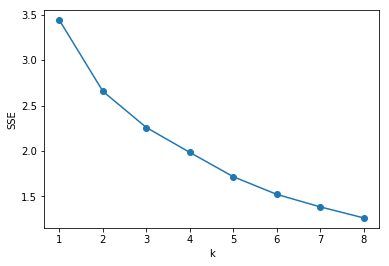

In [44]:
import matplotlib.pyplot as plt
Sf_grouped_clustering = Sf_grouped.drop('project_name', 1)
SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(Sf_grouped_clustering)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [32]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 1, 1, 1, 3, 1, 1, 1, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each project.

In [33]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each Rental project

# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Sf_merged = df_data
Sf_merged = Sf_merged.join(neighborhoods_venues_sorted.set_index('project_name'), on='project_name')
Sf_merged.head() # check the last columns!

,project_name,project_address,year_building_constructed,street_name,street_number,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alice Griffith - Phase 3B (Block 1B),94124,2018,Arelious Walker,2500,Bayview Hunters Point,Bayview,37.719645,-122.384831,0,Garden,Playground,Racetrack,Park,Football Stadium,Campground,Furniture / Home Store,Yoga Studio,Donut Shop,Dive Shop
8,125 Mason Street,94102,2008,Mason,125,Tenderloin,Downtown/Civic Center,37.784805,-122.409744,1,Theater,Cosmetics Shop,Clothing Store,Hotel,Coffee Shop,Music Venue,Women's Store,Speakeasy,Toy / Game Store,Art Gallery
10,Martin Luther King-Marcus Garvey Square Cooper...,94115,2011,Eddy,1680,Western Addition,Western Addition,37.781597,-122.434860,3,Indian Restaurant,Jazz Club,Ice Cream Shop,New American Restaurant,Tea Room,Lounge,Hobby Shop,Ramen Restaurant,Japanese Restaurant,Pool
19,Richardson Apartments (Parcel G),94102,2011,Fulton,365,Hayes Valley,Downtown/Civic Center,37.778492,-122.422958,3,Boutique,Café,French Restaurant,Clothing Store,Sushi Restaurant,Wine Bar,Furniture / Home Store,Optical Shop,Cocktail Bar,Coffee Shop
20,1100 Ocean,94112,2015,Ocean,1100,West of Twin Peaks,West of Twin Peaks,37.725575,-122.454155,3,Liquor Store,Poke Place,Grocery Store,Asian Restaurant,Chinese Restaurant,Pharmacy,Sandwich Place,Bubble Tea Shop,Burger Joint,Light Rail Station


### Finally, let's visualize the resulting clusters

In [46]:
# Visualize the resulting clusters

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# create map
map_clusters = folium.Map(location=[37.77, -122.42], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Sf_merged['latitude'], Sf_merged['longitude'], Sf_merged['planning_neighborhood'], Sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.1 Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

In [35]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#Cluster 1
Sf_Cluster1=Sf_merged.loc[Sf_merged['Cluster Labels'] == 0, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]
Sf_Cluster1.shape

(3, 16)

### Cluster 1

In [36]:
Sf_merged.loc[Sf_merged['Cluster Labels'] == 0, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]

,project_address,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94124,Bayview Hunters Point,Bayview,37.719645,-122.384831,0,Garden,Playground,Racetrack,Park,Football Stadium,Campground,Furniture / Home Store,Yoga Studio,Donut Shop,Dive Shop
246,94124,Bayview Hunters Point,Bayview,37.719087,-122.385317,0,Garden,Campground,Playground,Racetrack,Vietnamese Restaurant,Football Stadium,Stadium,Electronics Store,Dive Shop,Doctor's Office
330,94124,Bayview Hunters Point,Bayview,37.718338,-122.385991,0,Football Stadium,Garden,Stadium,Playground,Vietnamese Restaurant,Racetrack,Campground,Athletics & Sports,Electronics Store,Doctor's Office


### Cluster 2

In [37]:
Sf_Cluster2 = Sf_merged.loc[Sf_merged['Cluster Labels'] == 1, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]
Sf_Cluster2.shape

(33, 16)

In [38]:
Sf_Cluster2

,project_address,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,94102,Tenderloin,Downtown/Civic Center,37.784805,-122.409744,1,Theater,Cosmetics Shop,Clothing Store,Hotel,Coffee Shop,Music Venue,Women's Store,Speakeasy,Toy / Game Store,Art Gallery
51,94103,South of Market,South of Market,37.776009,-122.415817,1,Coffee Shop,Cocktail Bar,Beer Bar,Theater,Café,Art Gallery,Mexican Restaurant,Gay Bar,Street Food Gathering,Performing Arts Venue
52,94102,Tenderloin,Downtown/Civic Center,37.782761,-122.416573,1,Vietnamese Restaurant,Thai Restaurant,Coffee Shop,Indian Restaurant,Sandwich Place,Theater,Cocktail Bar,Mexican Restaurant,Speakeasy,Bar
58,94109,Tenderloin,Downtown/Civic Center,37.785679,-122.419380,1,Thai Restaurant,Vietnamese Restaurant,Bar,Sandwich Place,Cocktail Bar,Sushi Restaurant,Coffee Shop,Bakery,Café,Breakfast Spot
62,94103,South of Market,South of Market,37.781460,-122.409859,1,Coffee Shop,Hotel,Theater,Art Gallery,Music Venue,Bakery,Vietnamese Restaurant,Sandwich Place,Cocktail Bar,Indie Theater
89,94103,South of Market,South of Market,37.781048,-122.409363,1,Coffee Shop,Theater,Hotel,Art Gallery,Sandwich Place,Music Venue,Women's Store,Vietnamese Restaurant,Bakery,Clothing Store
95,94109,Tenderloin,Downtown/Civic Center,37.785370,-122.418434,1,Thai Restaurant,Vietnamese Restaurant,Bar,Sandwich Place,Coffee Shop,Cocktail Bar,Sushi Restaurant,Speakeasy,Mexican Restaurant,Breakfast Spot
98,94102,Tenderloin,Downtown/Civic Center,37.781788,-122.412544,1,Coffee Shop,Theater,Sandwich Place,Art Gallery,Indian Restaurant,Vietnamese Restaurant,Speakeasy,Beer Bar,Music Venue,Bar
109,94115,Western Addition,Western Addition,37.782044,-122.440170,1,Yoga Studio,Sandwich Place,Health & Beauty Service,Gym / Fitness Center,Cosmetics Shop,Café,Coffee Shop,Convenience Store,Tennis Court,Burrito Place
113,94103,South of Market,South of Market,37.776009,-122.415794,1,Coffee Shop,Cocktail Bar,Beer Bar,Theater,Café,Art Gallery,Mexican Restaurant,Gay Bar,Street Food Gathering,Performing Arts Venue


### Cluster 3

In [39]:
Sf_Cluster3 = Sf_merged.loc[Sf_merged['Cluster Labels'] == 2, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]
Sf_Cluster1.shape

(3, 16)

In [40]:
Sf_Cluster3

,project_address,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,94124,Bayview Hunters Point,Bayview,37.735226,-122.380759,2,Park,Skate Park,Bookstore,Brewery,Event Space,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
79,94124,Bayview Hunters Point,Bayview,37.735374,-122.380531,2,Park,Skate Park,Bookstore,Brewery,Event Space,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
176,94124,Bayview Hunters Point,Bayview,37.735785,-122.379774,2,Skate Park,Bookstore,Brewery,Park,Event Space,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant


### Cluster 4

In [41]:
Sf_Cluster4 = Sf_merged.loc[Sf_merged['Cluster Labels'] == 3, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]
Sf_Cluster4.shape

(32, 16)

In [42]:
Sf_Cluster4

,project_address,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,94115,Western Addition,Western Addition,37.781597,-122.434860,3,Indian Restaurant,Jazz Club,Ice Cream Shop,New American Restaurant,Tea Room,Lounge,Hobby Shop,Ramen Restaurant,Japanese Restaurant,Pool
19,94102,Hayes Valley,Downtown/Civic Center,37.778492,-122.422958,3,Boutique,Café,French Restaurant,Clothing Store,Sushi Restaurant,Wine Bar,Furniture / Home Store,Optical Shop,Cocktail Bar,Coffee Shop
20,94112,West of Twin Peaks,West of Twin Peaks,37.725575,-122.454155,3,Liquor Store,Poke Place,Grocery Store,Asian Restaurant,Chinese Restaurant,Pharmacy,Sandwich Place,Bubble Tea Shop,Burger Joint,Light Rail Station
28,94103,Mission,Mission,37.767296,-122.421402,3,Mexican Restaurant,Boutique,Yoga Studio,Gym / Fitness Center,Pizza Place,Furniture / Home Store,Cocktail Bar,Coffee Shop,Lounge,Beer Bar
31,94114,Castro/Upper Market,Castro/Upper Market,37.766285,-122.429916,3,Coffee Shop,Gay Bar,Gym,Sushi Restaurant,Grocery Store,Asian Restaurant,Sandwich Place,Café,Pet Store,Cocktail Bar
36,94102,Hayes Valley,Western Addition,37.774601,-122.424461,3,Boutique,Wine Bar,Clothing Store,Café,French Restaurant,Cocktail Bar,Optical Shop,New American Restaurant,Bubble Tea Shop,Dessert Shop
56,94102,Hayes Valley,Western Addition,37.771697,-122.426147,3,Wine Bar,Café,Sushi Restaurant,Pet Store,Cocktail Bar,Spa,Grocery Store,New American Restaurant,Ramen Restaurant,Gym / Fitness Center
63,94115,Western Addition,Western Addition,37.780460,-122.428680,3,Ice Cream Shop,Boutique,Pakistani Restaurant,Bubble Tea Shop,Seafood Restaurant,Convenience Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Caribbean Restaurant
65,94102,Hayes Valley,Western Addition,37.777557,-122.428947,3,Boutique,Clothing Store,Wine Bar,Park,Ice Cream Shop,Café,Dessert Shop,Liquor Store,Spa,Bike Shop
92,94124,Bayview Hunters Point,Bayview,37.725620,-122.395851,3,Mexican Restaurant,Piercing Parlor,Dance Studio,Burger Joint,Food Truck,Light Rail Station,Distillery,Bakery,BBQ Joint,Grocery Store


### Cluster 5

In [43]:
Sf_merged.loc[Sf_merged['Cluster Labels'] == 4, Sf_merged.columns[[1] + list(range(5, Sf_merged.shape[1]))]]

,project_address,neighborhood,planning_neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,94124,Bayview Hunters Point,Bayview,37.717174,-122.39222,4,Playground,Mountain,Park,Yoga Studio,English Restaurant,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store


## 5. Results and Discussion

Although there are 354 affordable Rental projects in San Francisco, only 72 projects which have the constructed year after 2005. As it is widely believed that a mature residential areas should be equipped with a range of living facilities, such as restaurants/gyms/markets/hospitals etc... Except Rental Price, living facilities is one of the most important factors that influence the finally decision.

This analysis shows that there are 298 uniques venue categories around all the projects, Top 10 Most Common Venue list above mainly relate to Food/Sports/Art/Leisure/Public Transport/Market etc...

As we can see from 4.1 Examine Clusters, after the K-means algorithm was applied, all the affordable housing pipeline projects were divided into 4 clusters:

1) Cluster 1 contains 3 affordable rental projects, top 10 Most Common Venue mainly contains Playground/ Racetrack /Park /Football Stadium /Campground /Furniture / Home Store /Yoga Studio /Donut Shop /Dive Shop, if the individual would like to have a fresh air and some quiet place for relax, these areas will be quite good.

2) Cluster 2 contains 33 affordable rental projects, this cluster contains most projects, top 10 Most Common Venue mainly contains Coffee Shop /Cocktail Bar /Nightclub /Gay Bar /Food Truck /Café /Motorcycle Shop /Thai Restaurant /Art Gallery /Furniture / Home Store etc.., almost cover every aspect of our daily life, obviously, it will be very convenient to live in these areas.

3) Cluster 3 contains 3 affordable rental projects, top 10 Most Common Venue mainly contains Park /Skate Park /Bookstore /Brewery /Event Space /Donut Shop /Dumpling Restaurant /Electronics Store /English Restaurant /Ethiopian Restaurant, it seems like these are community areas, living facilities are too simple here, but it may be good for those who work here.

4) Cluster 4 contains 32 affordable rental projects, top 10 Most Common Venue mainly contains Art Coffee Shop /Gay Bar /Gym /Sushi Restaurant /Grocery Store /Asian Restaurant /Sandwich Place /Café /Pet Store, it look like this cluster is a food areas which suitable for teenage. Their can try new food here and explore new culture such as Gay Bar or some Art Coffee Shop

5) Cluster 5 contains 1 affordable rental projects, this cluster contains most projects, top 10 Most Common Venue mainly contains Playground /Mountain 	Park /Yoga Studio /English Restaurant /Doctor's Office /Dog Run /Donut Shop /Dumpling Restaurant /Electronics Store etc.., living facilities are too simple here, but it may be good for those who work here.


## 6. Conclusion

Purpose of this project is try to find a category of optimal affordable Rental projects with better living facilities. Target to individuals who want to travel to San Francisco for business or holiday with a limit budget. As it is widely believed that a most of residential areas should be equipped with a range of living facilities, such as restaurants/gyms/markets/hospitals etc... 

The Foursquare location data was leveraged to compare each project to provide reliable suggestions for individuals who want to choose some place with better living facilities. With unsupervised learning K-means algorithm, all the affordable Rental projects were clustered in to 5 categories, the advantages of each category was expressed to help individuals choose their best one.

This Project simply processed the Rental affordable housing programs data, and cluster them into 5 categories based one the living facilities data, the results can only help individuals choose the place they want to rent with affordable price and better living facilities. Further analysis can be done base on these 5 clusters, which can help provide more detail information to clarify the advantages of each category.
